Title: Sampling from Probability Distributions
Author: Thomas Breuel
Institution: UniKL

In [1]:

from pylab import *

# Sampling from Distributions

We can easily sample for distributions in Python.
The basic distributions are `randn` (normal density) and `rand` (uniform density).

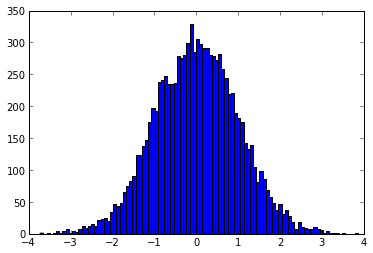

In [4]:
data = randn(10000)
_=hist(data,bins=100)

# Binomial Distributions

If we want a binomial variable with $p=0.1$, we can sample as follows:



In [69]:
n = 1000
p = 0.1
sum(rand(n)<p)

109

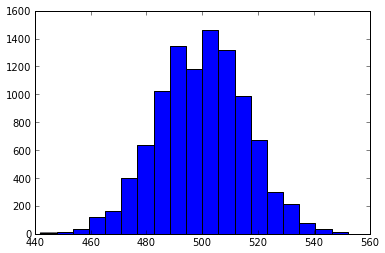

In [70]:
p = 0.5
dist = array([sum(rand(n)<p) for i in range(10000)])
_=hist(dist,bins=20)

In [68]:
print mean(dist),var(dist)

500.114 246.746804


Theoretical values are:

$$ \bar{x} = n ~ p $$
$$ v = n ~ p ~(1-p) $$

In [71]:
print n*p
print n*p*(1-p)

500.0
250.0


# Parameter Estimation

We often estimate parameters from measurements. Let's do this for a normal density.



In [86]:
data = randn(1000)
print mean(data),var(data)

0.0317909909166 0.877621361124


Note that our parameter estimates themselves have a distribution of errors.



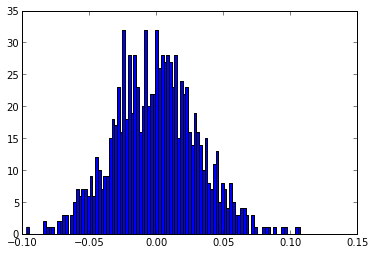

In [87]:
means = [mean(randn(1000)) for i in range(1000)]
_=hist(means,bins=100)

# Extreme Value Distributions

Another interesting example is extreme value distributions. They matter a great deal in biology and business, where "the best" of a population often "win" or are measured. They also matter when people tell you statistics like "90 percent of population X are women/men, therefore there must be bias".



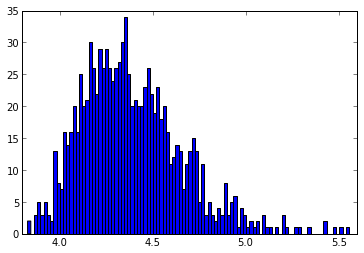

In [102]:
N = 100000
maxs = array([amax(randn(N)) for i in range(1000)])
_=hist(maxs,bins=100)

This kind of bias (around 20 percent of the standard deviation here) leads to a bias in maxima.



0.70599999999999996

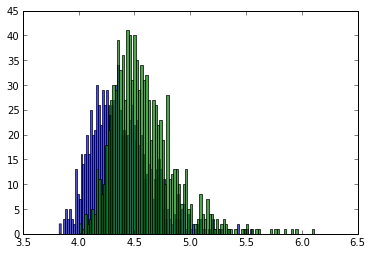

In [103]:
max1s = array([amax(randn(N)+0.2) for i in range(1000)])
_=hist(maxs,bins=100,alpha=0.7)
_=hist(max1s,bins=100,alpha=0.7)
sum(max1s>maxs)*1.0/len(maxs)

Interestingly, you can get much greater extreme value differences without any bias at all, simply by having more variance in one population than in another.



0.82399999999999995

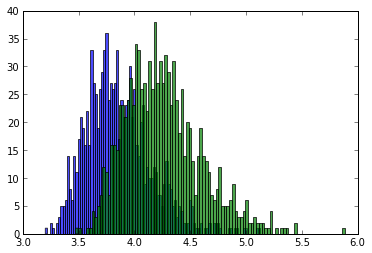

In [104]:
maxs = array([amax(randn(10000)) for i in range(1000)])
max2s = array([amax(1.1*randn(10000)) for i in range(1000)])
_=hist(maxs,bins=100,alpha=0.7)
_=hist(max2s,bins=100,alpha=0.7)
sum(max2s>maxs)*1.0/len(maxs)

# Conditional Distributions

Let's look at another important example from statistics. Consider a population of size $N = 1000000$:



In [105]:
N = 1000000

Now assume that about 1:1000 of the population are infected with some disease.



In [106]:
infected = (rand(N)<1e-3)
sum(infected)

1045

Also, assume we have a test that is 99 percent accurate. We give the test to the entire population and measure the results.



In [107]:
testresult = where(rand(N)<1e-2,1-infected,infected)
sum(testresult)

11120

Now, let's look at the population of people whose test result is positive.
What fraction of those people are infected?



In [108]:
sum(infected[testresult==True])*1.0/sum(testresult==True)

0.092985611510791363

(Implications)

That's not good: less than 10 percent of the population that tests positive is actually infected. Ninety percent of those who test positive are _false positives_ even though the test is 99 percent accurate.

This is a common issue in medicine, anti-terrorism, and many other problems:

- testing everybody for HIV infection
- testing everybody for prostate cancer / breast cancer
- widespread Internet surveillance for "terrorism"

All of these end up generating enormous numbers of false positives.

(Bayesian Calculation)

Mathematically, we write this in terms of _conditional probabilities_:

prior probability: 

$$P(i)$$

probability of test: 

$$P(t=0|i=0) = 0.99$$
$$P(t=1|i=1) = 0.99$$

Bayes formula:

$$ P(i=1|t=1) = \frac{P(t=1|i=1) P(i=1)}{P(t=1)} = \frac{P(t=1|i=1) P(i=1)}{P(t=1|i=0) P(i=0) + P(t=1|i=1) P(i=1) } $$

$$ ~~~~~~ = \frac{0.99 \cdot 0.001}{ 0.01 \cdot 0.999 + 0.99 \cdot 0.001  } \approx \frac{0.001}{0.01} = 0.1 $$



(Derivation of Bayes Formula)

Joint density ($c$ and $x$ could be any variables):

$$ p(c,x) $$

Conditional density:

$$ p(c,x) = P(c|x) ~ p(x) $$

Bayes formula:

$$ P(c|x) ~ p(x) ~ = ~ p(x|c) ~ P(c) $$

$$ P(c|x) = \frac{p(x|c) P(c)}{p(x)} $$